# Módulo 2 - Elementos de probabilidad y estadística

Facultad de Ciencias Exactas y Naturales y Agrimensura (FaCENA) - UNNE

Diplomatura Universitaria en Ciencia de Datos

Profesores:
* Lic. Álvarez Fernando fernando.alvarez@comunidad.unne.edu.ar
* Lic. Cabás Celine celine.cabas@comunidad.unne.edu.ar
* Dr. Hisgen Matías matias.hisgen@comunidad.unne.edu.ar

\

---

Cargamos las librerias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Para graficar fechas
import math # Para logaritmos
import os # Para cambiar directorios para los que trabajen de forma local en sus computadoras
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter # Filtro HP

Hacemos la conexion con el drive.

In [2]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Nos posicionamos en el directorio donde esta la tabla
%cd "/content/drive/My Drive/Diplomatura Ciencia de Datos FaCENA - Módulo 2"

Mounted at /content/drive
/content/drive/My Drive/Diplomatura Ciencia de Datos FaCENA - Módulo 2


Método local.

In [ ]:
#os.chdir()

# Series de tiempo

Las series de tiempo son secuencias de datos observados en intervalos de tiempo y ordenados cronologicamente. Por lo general estos intervalos suelen ser iguales, de forma periódica.

Las series de tiempo se componen por lo general de 4 componentes:
* Tendencia: la evolución a largo plazo de la serie.
* Estacionalidad: movimientos de corto plazo que se repiten de forma periódica.
* Ciclo: oscilaciones periódicas de mediano plazo. Generalmente se pueden analizar como oscilaciones alrededor de la tendencia.
* Componente aleatorio o irregular: todo lo que no se puede explicar en los anteriores items.

Entonces tenemos que una serie de tiempo cualquier se compone de los elementos antes mencionados, ahora resta saber como se combinan los mismos para formar dicha serie. Existen dos modelos generalmente usados:

**Serie de tiempo aditivia**. Donde se suman cada uno de los componentes.
$$
x_t = T_t + E_t + C_t + I_t
$$
Donde **$x$** es nuestra variable aleatoria generada por un proceso de serie de tiempo, **$T$** es la tendencia de la misma, **$E$** el componente estacional, **$C$** el ciclo e **$I$** el componente irregular y por último el subindice **$t$** indica el indice de tiempo.

**Serie de tiempo multiplicativa.** Los componente se multiplican.
$$ x_t = T_t.E_t.C_t.I_t $$

Cabe destacar que la mayoria de los modelos emplean el método aditivo pero aunque nuestra serie presente un composición multiplicativa, todavía se puede recurrir al primero de forma simple mediante los logaritmos, recordando la propiedad de que:
$$ log(a.b) = log(a) + log(b) $$
Entoncese tenemos que:
$$ log(x_t) = log(T_t.E_t.C_t.I_t) = log(T_t)+log(E_t)+log(C_t)+log(I_t) $$

Por lo general los componentes tendencia y estacionalidad tienen unos métodos sencillos de calcularlos, los veremos ahora con algunos ejemplos.

## Ventas supermercados

Para este ejemplo tomamos la base de ventas de supermercados que contiene las ventas en las provincias que conforman el NEA (Chaco, Corrientes, Formosa y Misiones) y a nivel nacional.

Cargamos la base.

Dejo el link a la fuente de datos.
https://www.indec.gob.ar/indec/web/Nivel4-Tema-3-1-34

In [ ]:
ventas = pd.read_csv('Bases/ventas_supermercado.csv', sep=';', parse_dates=["fecha"])

Seteo la columna fecha como índice, tambíen podría haber hecho esto mismo en el comando anterior con el parámetro "index_col='fecha'" pero esto eliminaria la columna fecha como tal, así que primero creo una nueva variable idéntica a fecha y la asigno como índice.

In [ ]:
ventas['fecha_index'] = ventas['fecha']
ventas.set_index('fecha_index', inplace=True)

In [ ]:
ventas.head()

,fecha,provincia,ventas
fecha_index,,,
2017-01-01,2017-01-01,Chaco,296129.5380
2017-02-01,2017-02-01,Chaco,271652.6886
2017-03-01,2017-03-01,Chaco,298483.7398
2017-04-01,2017-04-01,Chaco,307167.1971
2017-05-01,2017-05-01,Chaco,302466.1967


Notar dos cosas, uno que el índice en este caso es la fecha y dos que el formato de la base es más parecido al que uno suele trabajar con. Tenemos por ejemplo los datos repetidos de ventas por provincia, en vez de tener un formato más columnar con una columna por provincia. Esté formato sirve cuando tenemos que hacer agregaciones como las que vamos a realizar ahora.

Pero primero separo en dos la base, los datos de las provincias del NEA por un lado, y los datos a nivel nacional por el otro.

In [ ]:
ventas_nea = ventas[ventas.provincia.isin(['Chaco', 'Corrientes', 'Formosa', 'Misiones'])]
ventas_nacional = ventas[~ventas.provincia.isin(['Chaco', 'Corrientes', 'Formosa', 'Misiones'])]

Como tenemos la fecha como índice y también como variable podemos hacer filtrados de dos formas.

Supongamos que queremos los datos anteriores a 2017-12-01.

In [ ]:
ventas_nea[:'2017-12-01']

,fecha,provincia,ventas
fecha_index,,,
2017-01-01,2017-01-01,Chaco,296129.5380
2017-02-01,2017-02-01,Chaco,271652.6886
2017-03-01,2017-03-01,Chaco,298483.7398
2017-04-01,2017-04-01,Chaco,307167.1971
2017-05-01,2017-05-01,Chaco,302466.1967
2017-06-01,2017-06-01,Chaco,307564.0576
2017-07-01,2017-07-01,Chaco,318187.0210
2017-08-01,2017-08-01,Chaco,322988.4731
2017-09-01,2017-09-01,Chaco,321779.7585


Con la columna.

In [ ]:
ventas_nea[ventas_nea.fecha<="2017-12-01"]

,fecha,provincia,ventas
fecha_index,,,
2017-01-01,2017-01-01,Chaco,296129.5380
2017-02-01,2017-02-01,Chaco,271652.6886
2017-03-01,2017-03-01,Chaco,298483.7398
2017-04-01,2017-04-01,Chaco,307167.1971
2017-05-01,2017-05-01,Chaco,302466.1967
2017-06-01,2017-06-01,Chaco,307564.0576
2017-07-01,2017-07-01,Chaco,318187.0210
2017-08-01,2017-08-01,Chaco,322988.4731
2017-09-01,2017-09-01,Chaco,321779.7585


Ahora bien, queremos una base agregada para el NEA, eso lo logramos con algunos comandos como groupby y luego la aplicación de agregación que querramos hacer, en este caso de suma.

In [ ]:
ventas_nea = ventas_nea.groupby('fecha').sum()
ventas_nea.head()

,provincia,ventas
fecha,,
2017-01-01,ChacoCorrientesFormosaMisiones,1.302885e+06
2017-02-01,ChacoCorrientesFormosaMisiones,1.210504e+06
2017-03-01,ChacoCorrientesFormosaMisiones,1.321517e+06
2017-04-01,ChacoCorrientesFormosaMisiones,1.356189e+06
2017-05-01,ChacoCorrientesFormosaMisiones,1.327878e+06


Graficamos para poder ver la serie. Primero por defecto.

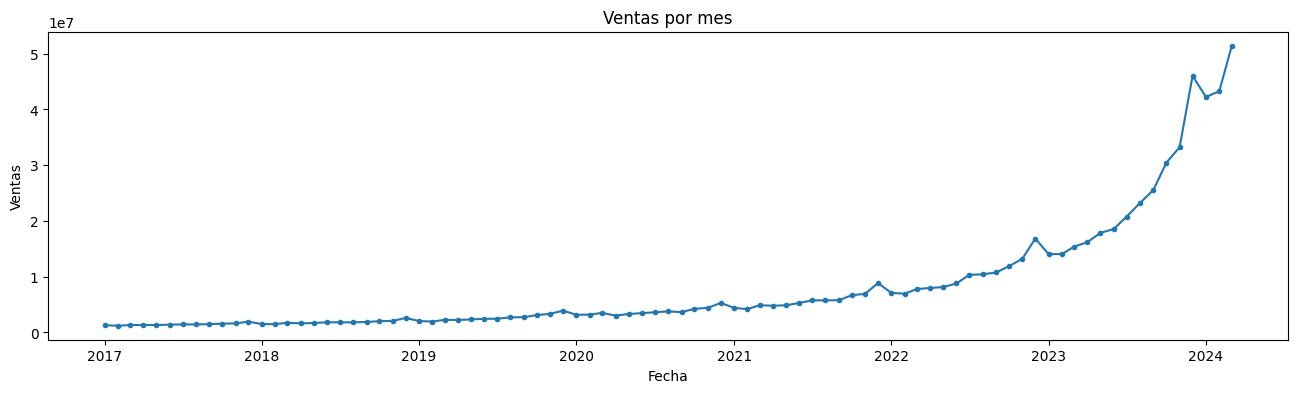

In [ ]:
plt.figure(figsize=(16, 4))

plt.plot(ventas_nea.index, ventas_nea.ventas, marker='.', linestyle='-')
plt.title('Ventas por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

Ahora si queremos ver por mes.

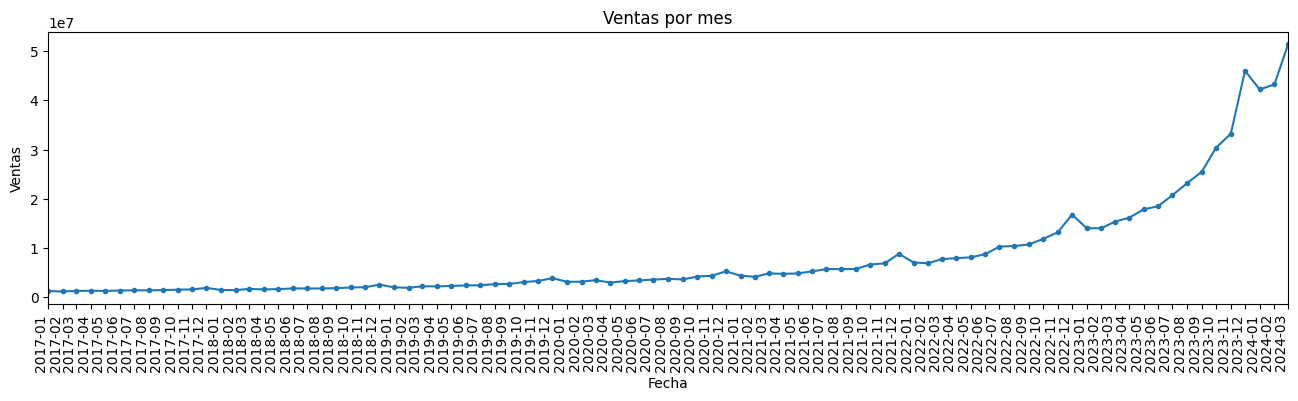

In [ ]:
plt.figure(figsize=(16, 4))

plt.plot(ventas_nea.index, ventas_nea.ventas, marker='.', linestyle='-')
plt.title('Ventas por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas')

locator = mdates.MonthLocator()  # Setea los intervalos a meses

formatter = mdates.DateFormatter('%Y-%m') # Setea el formato a solo año-mes

# Aplicamos lo anterior al eje x
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Ajustamos la rotacion de las fechas
plt.gcf().autofmt_xdate(rotation=90)

# Ajusto los limites del plot
plt.xlim(ventas_nea.index.min(), ventas_nea.index.max())

plt.show()

Procedemos a obtener una tendencia de la serie. La forma más común de todas es la tendencia lineal. Esto se resuelve creando una variable tipo índice que comienze en 1.

In [ ]:
ventas_nea['tendencia'] = np.arange(1, len(ventas_nea)+1)

Ahora regreso nuestra variable de ventas contra esta nueva variable y obtengo las estimaciones.

In [ ]:
X = ventas_nea['tendencia']
X = sm.add_constant(X)
y = ventas_nea['ventas']

reg_tend1 = sm.OLS(y,X).fit()
preds_tend1 = reg_tend1.predict(X)

Ahora ploteo ambas.

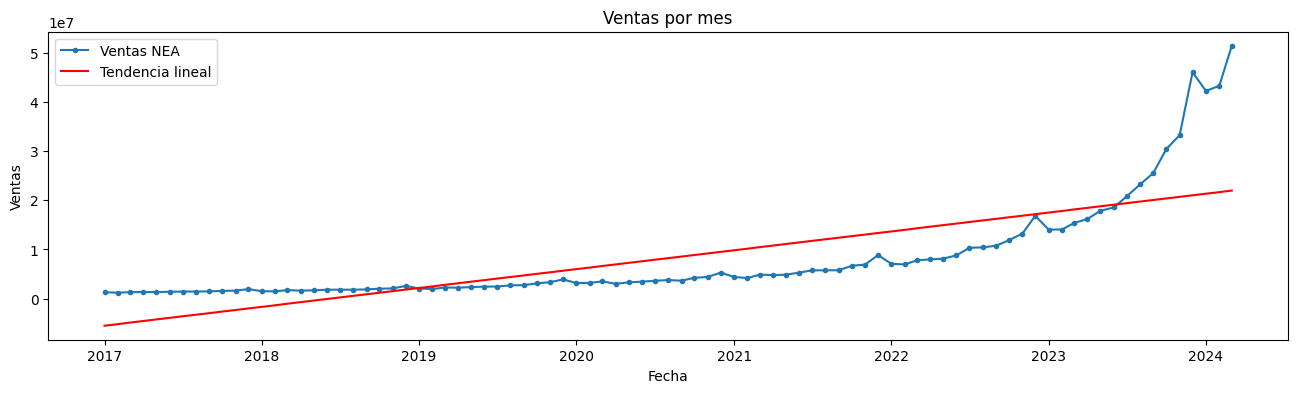

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(ventas_nea.index, ventas_nea.ventas, marker='.', linestyle='-', label='Ventas NEA')
plt.plot(ventas_nea.index, preds_tend1, color="red", label="Tendencia lineal")
plt.title('Ventas por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

Vemos que si bien tiene una tendencia alcista, la tendencia como que no ajusta bien. En este caso podemos intentar con una tendencia cuadrática.

In [ ]:
ventas_nea['tendencia_cuad'] = ventas_nea['tendencia']**2

In [ ]:
X = ventas_nea[['tendencia','tendencia_cuad']]
X = sm.add_constant(X)
y = ventas_nea['ventas']

reg_tend2 = sm.OLS(y,X).fit()
preds_tend2 = reg_tend2.predict(X)

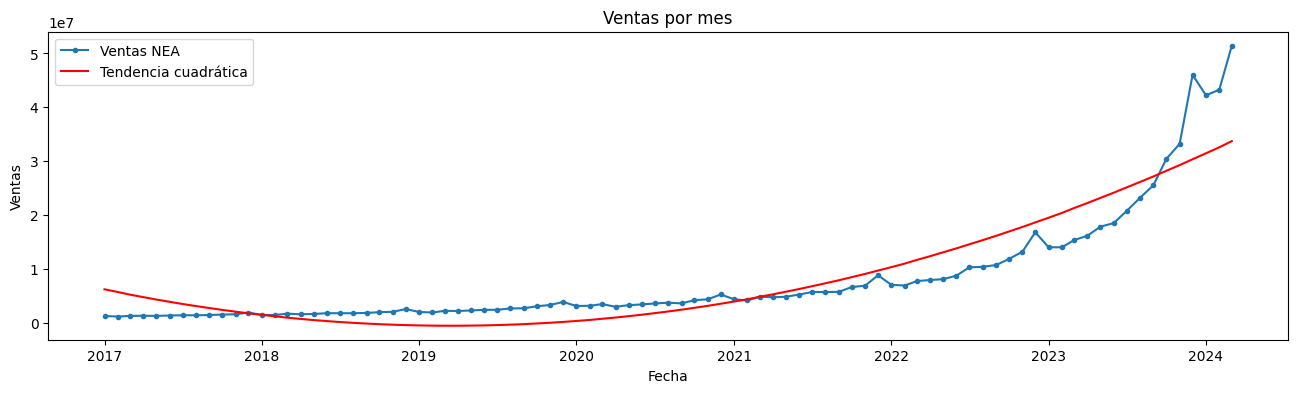

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(ventas_nea.index, ventas_nea.ventas, marker='.', linestyle='-', label='Ventas NEA')
plt.plot(ventas_nea.index, preds_tend2, color="red", label="Tendencia cuadrática")
plt.title('Ventas por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

Ahora capta mejor la suba de los últimos años aunque subestima los años del medio.

Esto capaz se puede subsanar si tomamtos logaritmos.

In [ ]:
ventas_nea['log_ventas'] = np.log(ventas_nea['ventas'])

Volvemos a regresar contra la tendencia lineal pero esta vez con los logaritmos.

In [ ]:
X = ventas_nea[['tendencia']]
X = sm.add_constant(X)
y = ventas_nea['log_ventas']

reg_tend_log = sm.OLS(y,X).fit()
preds_tend_log = reg_tend_log.predict(X)

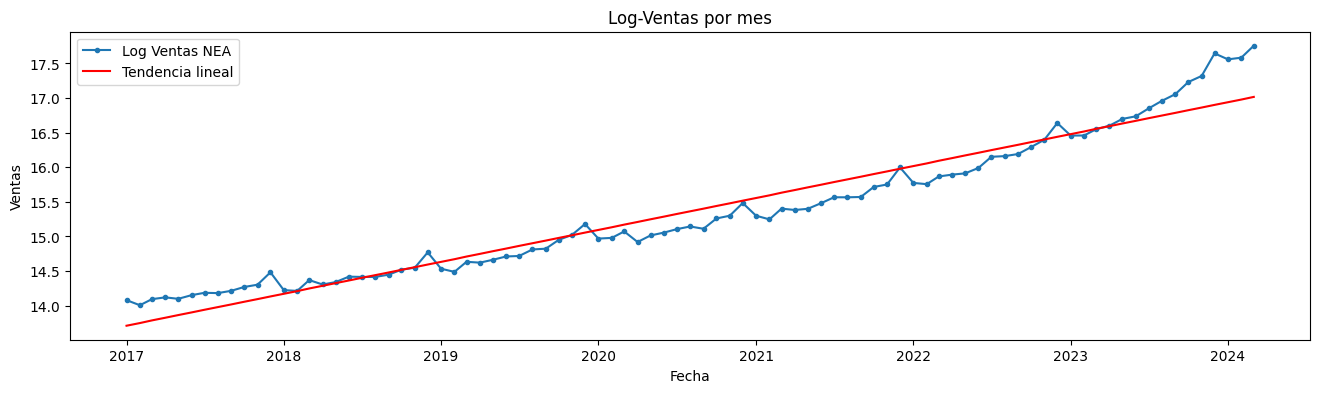

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(ventas_nea.index, ventas_nea.log_ventas, marker='.', linestyle='-', label='Log Ventas NEA')
plt.plot(ventas_nea.index, preds_tend_log, color="red", label="Tendencia lineal")
plt.title('Log-Ventas por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

Vemos que incluso con la lineal mejora bastante la tendencia, teniendo en cuenta que ahora la serie los salto bruscos fueron suavizados.

En el caso de ventas de supermercados, al estar valuadas en pesos corrientes tenemos que una influencia muy importante de la inflación que es la que marca mayoritariamente la tendencia. Podemos subsanar en parte este problema si por ejemplo deflactamos la serie por algún índice de precios. Utilizamos entonces la base del IPC.

In [ ]:
ipc = pd.read_csv('Bases/ipc.csv', sep=';', index_col="fecha", parse_dates=["fecha"])

In [ ]:
ipc.head()

,region,ipc
fecha,,
2016-12-01,Nación,100.0000
2017-01-01,Nación,101.5859
2017-02-01,Nación,103.6859
2017-03-01,Nación,106.1476
2017-04-01,Nación,108.9667


Separamos en el indice regional NEA y el indice general nacional.



In [ ]:
ipc_nea = ipc[ipc.region=="NEA"].drop('region', axis=1)
ipc_nacional = ipc[ipc.region=="Nación"].drop('region', axis=1)

Unimos los datos de ventas con los datos de ipc. Al tener ambas bases indices de fecha se unen automáticamente por el éste cuando hago un join, de lo contrario habría que especificar columnas.

In [ ]:
ventas_nea = ventas_nea.join(ipc_nea)
ventas_nea

,provincia,ventas,tendencia,tendencia_cuad,log_ventas,ipc
fecha,,,,,,
2017-01-01,ChacoCorrientesFormosaMisiones,1.302885e+06,1,1,14.080092,101.6727
2017-02-01,ChacoCorrientesFormosaMisiones,1.210504e+06,2,4,14.006547,103.4617
2017-03-01,ChacoCorrientesFormosaMisiones,1.321517e+06,3,9,14.094291,105.9880
2017-04-01,ChacoCorrientesFormosaMisiones,1.356189e+06,4,16,14.120189,108.3473
2017-05-01,ChacoCorrientesFormosaMisiones,1.327878e+06,5,25,14.099093,110.4331
...,...,...,...,...,...,...
2023-11-01,ChacoCorrientesFormosaMisiones,3.323146e+07,83,6889,17.319007,2957.0559
2023-12-01,ChacoCorrientesFormosaMisiones,4.603321e+07,84,7056,17.644874,3795.5250
2024-01-01,ChacoCorrientesFormosaMisiones,4.223175e+07,85,7225,17.558683,4535.8005


Para obtener los valores a precios constantes hay que definir primeramente una fecha de base, para facilitar los cálculos definimos diciembre de 2016 como base dado que ya es 100. Luego obtenemos los valores a precios de diciembre de 2016 de la siguiente forma:
$$ x^{cons}_t = x_t^{corriente}*\frac{Indice_{base}}{Indice_t} $$

In [ ]:
ventas_nea['ventas_cons'] = ventas_nea['ventas']*100/ventas_nea['ipc']

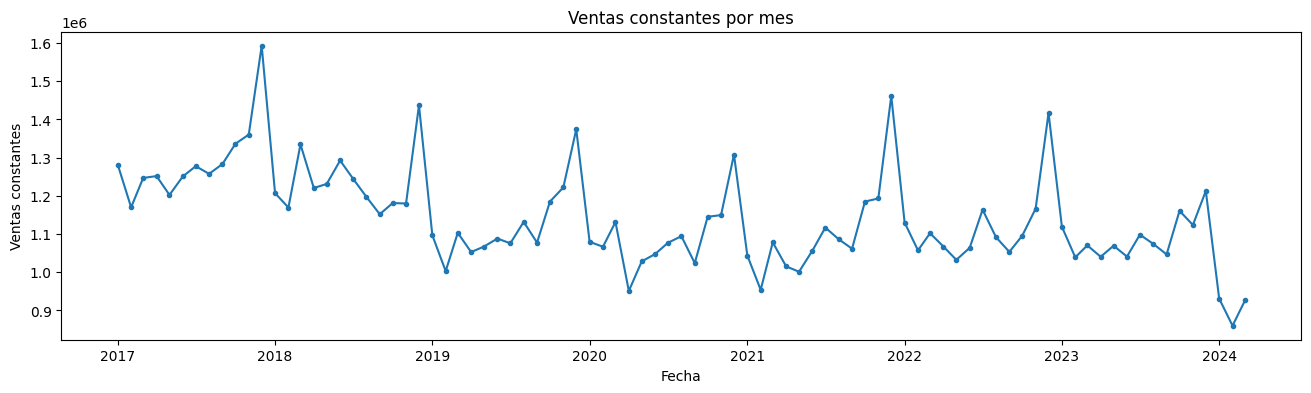

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(ventas_nea.index, ventas_nea.ventas_cons, marker='.', linestyle='-')
plt.title('Ventas constantes por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas constantes')
plt.show()

Realizamos el mismo procedimiento para las ventas nacionales.

In [ ]:
ventas_nacional = ventas_nacional.join(ipc_nacional)
ventas_nacional['ventas_cons'] = ventas_nacional['ventas']*100/ventas_nacional['ipc']

Graficamos ambas series juntas.

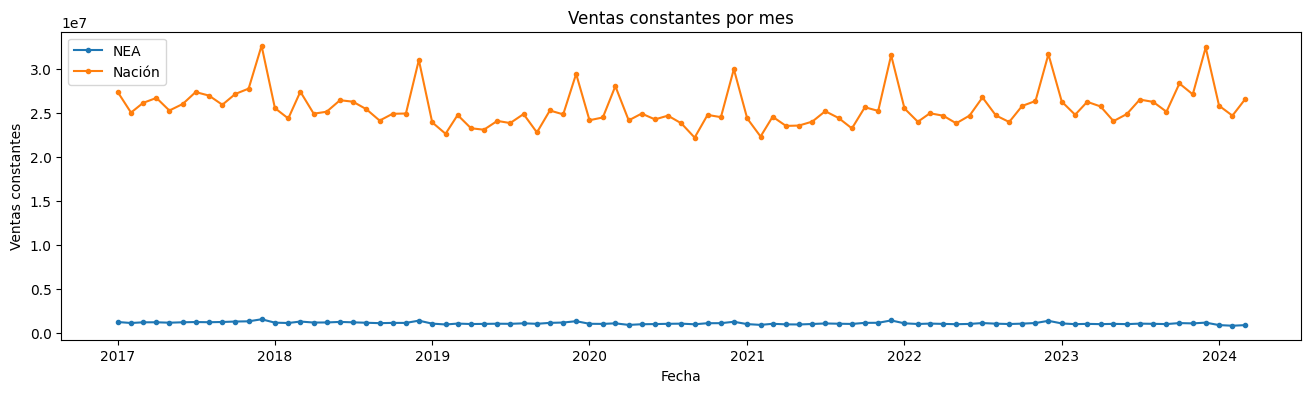

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(ventas_nea.index, ventas_nea.ventas_cons, marker='.', linestyle='-', label="NEA")
plt.plot(ventas_nacional.index, ventas_nacional.ventas_cons, marker='.', linestyle='-', label="Nación")
plt.title('Ventas constantes por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas constantes')
plt.legend()
plt.show()

Las escalas resultan dificultoso comparar en gráficos. Convertimos en indices base 100 en 2017 para más facil lectura.

In [ ]:
ventas_nea_2017 = ventas_nea[ventas_nea.index.year==2017].ventas_cons.mean()
ventas_nea['ventas_cons_100'] = ventas_nea['ventas_cons']/ventas_nea_2017*100

ventas_nacional_2017 = ventas_nacional[ventas_nacional.index.year==2017].ventas_cons.mean()
ventas_nacional['ventas_cons_100'] = ventas_nacional['ventas_cons']/ventas_nacional_2017*100

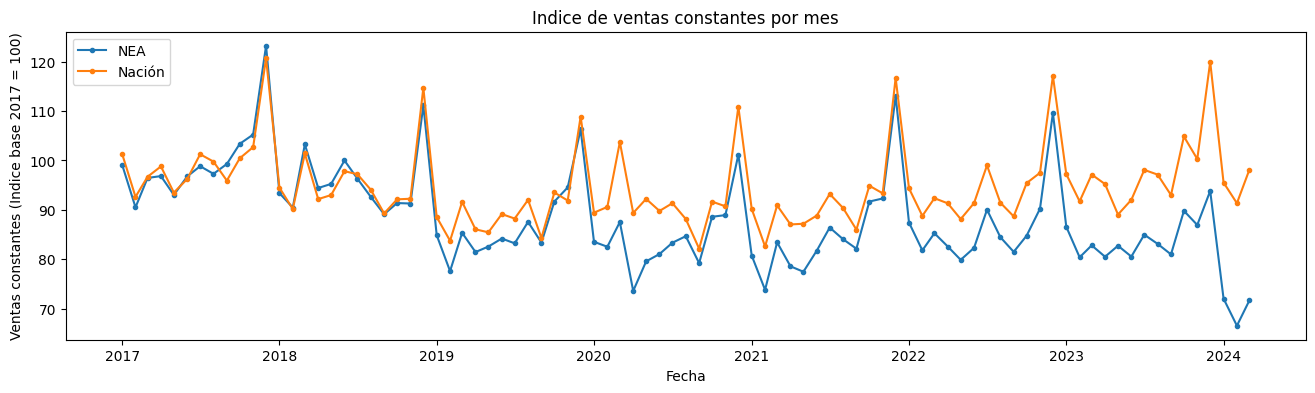

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(ventas_nea.index, ventas_nea.ventas_cons_100, marker='.', linestyle='-', label="NEA")
plt.plot(ventas_nacional.index, ventas_nacional.ventas_cons_100, marker='.', linestyle='-', label="Nación")
plt.title('Indice de ventas constantes por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas constantes (Indice base 2017 = 100)')
plt.legend()
plt.show()

Otra forma de obtener una tendencia es realizar lo que se conoce como media movil. Lo que realiza esta medida es basicamente tomar medias por intervalos, por ejemplo si hago una media movil de 6 meses toma los primeros 6 meses obtiene una media movil, se mueve un mes y obtiene la media de otros 6 meses y así hasta llegar al final de la serie.

In [ ]:
ventas_nea['ventas_ma'] = ventas_nea['ventas_cons_100'].rolling(12).mean()
ventas_nacional['ventas_ma'] = ventas_nacional['ventas_cons_100'].rolling(12).mean()

In [ ]:
ventas_nea['ventas_ma'].head(6)

fecha
2017-01-01          NaN
2017-02-01          NaN
2017-03-01          NaN
2017-04-01          NaN
2017-05-01          NaN
2017-06-01    95.457347
Name: ventas_ma, dtype: float64

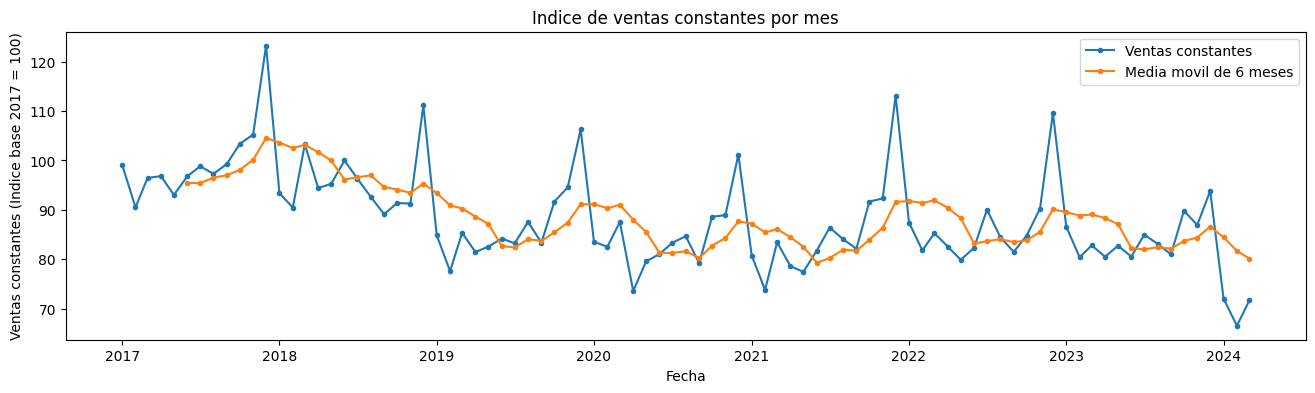

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(ventas_nea.index, ventas_nea.ventas_cons_100, marker='.', linestyle='-', label="Ventas constantes")
plt.plot(ventas_nea.index, ventas_nea.ventas_ma, marker='.', linestyle='-', label="Media movil de 6 meses")
plt.title('Indice de ventas constantes por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas constantes (Indice base 2017 = 100)')
plt.legend()
plt.show()

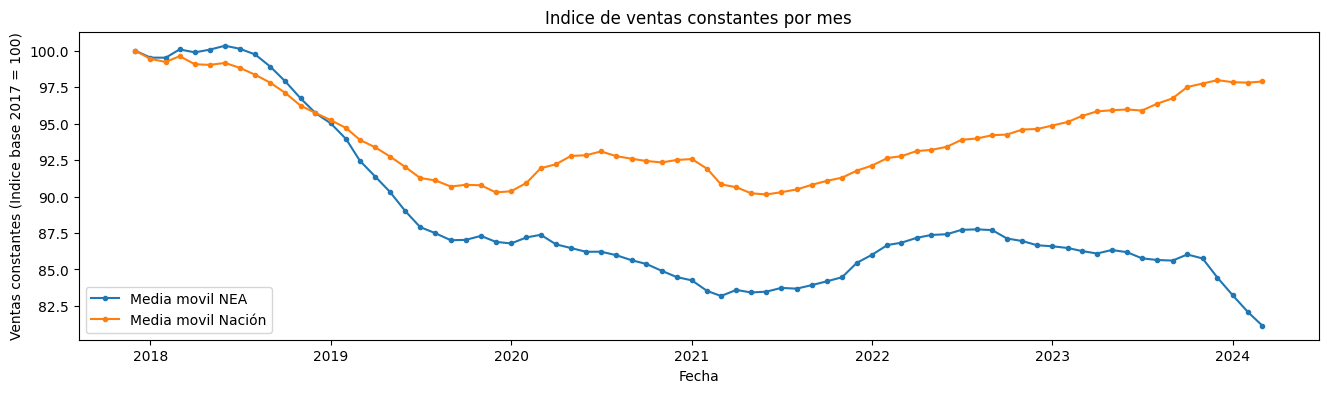

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(ventas_nea.index, ventas_nea.ventas_ma, marker='.', linestyle='-', label="Media movil NEA")
plt.plot(ventas_nacional.index, ventas_nacional.ventas_ma, marker='.', linestyle='-', label="Media movil Nación")
plt.title('Indice de ventas constantes por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas constantes (Indice base 2017 = 100)')
plt.legend()
plt.show()

Modelamos la serie de ventas constantes con tendencia para ver que tan bien predice.

In [ ]:
X = ventas_nea[['tendencia']]
X = sm.add_constant(X)
y = ventas_nea['ventas_cons']

reg_tend = sm.OLS(y,X).fit()
reg_tend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ventas_cons   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     29.00
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           6.34e-07
Time:                        14:18:39   Log-Likelihood:                -1132.1
No. Observations:                  87   AIC:                             2268.
Df Residuals:                      85   BIC:                             2273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.254e+06   2.37e+04     52.862      0.000    1.21e+06     1.3e+06
tendencia  -2521.5658    468.264     -5.385      0.000   -3452.601   -1590.531
==============================================================================
Omnibus:                       25.825   Durbin-Watson:                   1.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.016
Skew:                           1.220   Prob(JB):                     7.52e-10
Kurtosis:                       5.373   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que tan bien predice gráficamente.

In [ ]:
preds_tend = reg_tend.predict(X)

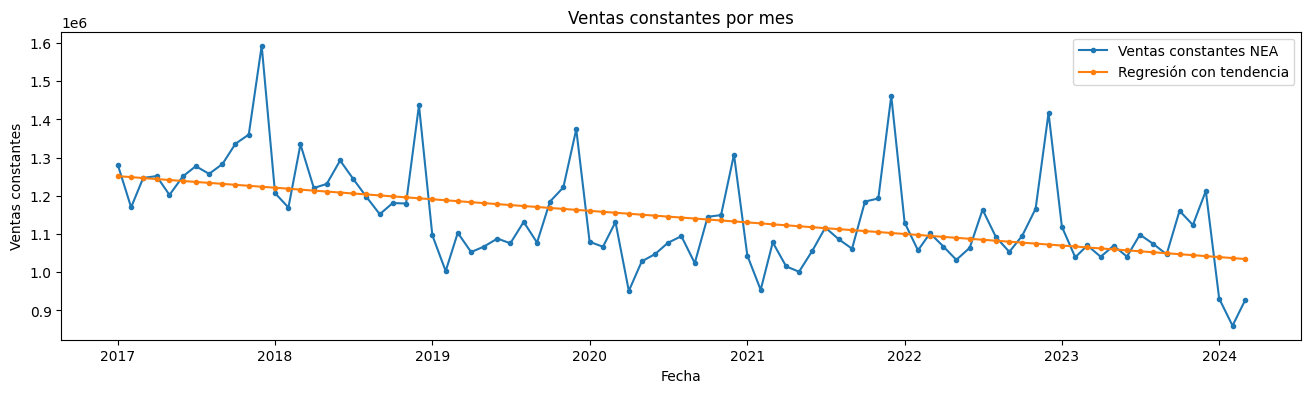

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(ventas_nea.index, ventas_nea.ventas_cons, marker='.', linestyle='-', label="Ventas constantes NEA")
plt.plot(ventas_nea.index, preds_tend, marker='.', linestyle='-', label="Regresión con tendencia")
plt.title('Ventas constantes por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas constantes')
plt.legend()
plt.show()

Agregamos dummies de estacionalidad para captar mejor los picos por ejemplo de diciembre.

Primero obtenemos una variable mes de la base original y luego le aplicamos el método de dummies.

In [ ]:
ventas_nea['mes'] = ventas_nea.index.month
ventas_nea = pd.get_dummies(ventas_nea, columns=['mes'], drop_first=True, dtype=int)

In [ ]:
ventas_nea.head()

,provincia,ventas,tendencia,tendencia_cuad,log_ventas,ipc,ventas_cons,ventas_cons_100,ventas_ma,mes_2,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
fecha,,,,,,,,,,,,,,,,,,,,
2017-01-01,ChacoCorrientesFormosaMisiones,1.302885e+06,1,1,14.080092,101.6727,1.281451e+06,99.138451,NaN,0,0,0,0,0,0,0,0,0,0,0
2017-02-01,ChacoCorrientesFormosaMisiones,1.210504e+06,2,4,14.006547,103.4617,1.170002e+06,90.516329,NaN,1,0,0,0,0,0,0,0,0,0,0
2017-03-01,ChacoCorrientesFormosaMisiones,1.321517e+06,3,9,14.094291,105.9880,1.246855e+06,96.461985,NaN,0,1,0,0,0,0,0,0,0,0,0
2017-04-01,ChacoCorrientesFormosaMisiones,1.356189e+06,4,16,14.120189,108.3473,1.251705e+06,96.837240,NaN,0,0,1,0,0,0,0,0,0,0,0
2017-05-01,ChacoCorrientesFormosaMisiones,1.327878e+06,5,25,14.099093,110.4331,1.202427e+06,93.024875,NaN,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
X = ventas_nea[['tendencia','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']]
X = sm.add_constant(X)
y = ventas_nea['ventas_cons']

reg_tend_estac = sm.OLS(y,X).fit()
reg_tend_estac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ventas_cons   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     21.69
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           1.49e-19
Time:                        14:32:41   Log-Likelihood:                -1079.3
No. Observations:                  87   AIC:                             2185.
Df Residuals:                      74   BIC:                             2217.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.23e+06   2.55e+04     48.152      0.000    1.18e+06    1.28e+06
tendencia  -2757.5414    274.545    -10.044      0.000   -3304.583   -2210.499
mes_2      -6.841e+04    3.2e+04     -2.136      0.036   -1.32e+05   -4596.723
mes_3       1.856e+04    3.2e+04      0.579      0.564   -4.53e+04    8.24e+04
mes_4      -3.375e+04   3.32e+04     -1.018      0.312   -9.98e+04    3.23e+04
mes_5      -2.626e+04   3.32e+04     -0.792      0.431   -9.23e+04    3.98e+04
mes_6       6208.7433   3.32e+04      0.187      0.852   -5.98e+04    7.23e+04
mes_7       3.952e+04   3.32e+04      1.192      0.237   -2.65e+04    1.06e+05
mes_8         2.5e+04   3.32e+04      0.754      0.453   -4.11e+04    9.11e+04
mes_9      -5817.6332   3.32e+04     -0.175      0.861   -7.19e+04    6.02e+04
mes_10      8.127e+04   3.32e+04      2.451      0.017    1.52e+04    1.47e+05
mes_11      9.918e+04   3.32e+04      2.990      0.004    3.31e+04    1.65e+05
mes_12      3.031e+05   3.32e+04      9.135      0.000    2.37e+05    3.69e+05
==============================================================================
Omnibus:                       10.672   Durbin-Watson:                   0.485
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                3.493
Skew:                          -0.018   Prob(JB):                        0.174
Kurtosis:                       2.019   Cond. No.                         603.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Grafico la regresión.

In [ ]:
preds_tend_estac = reg_tend_estac.predict(X)

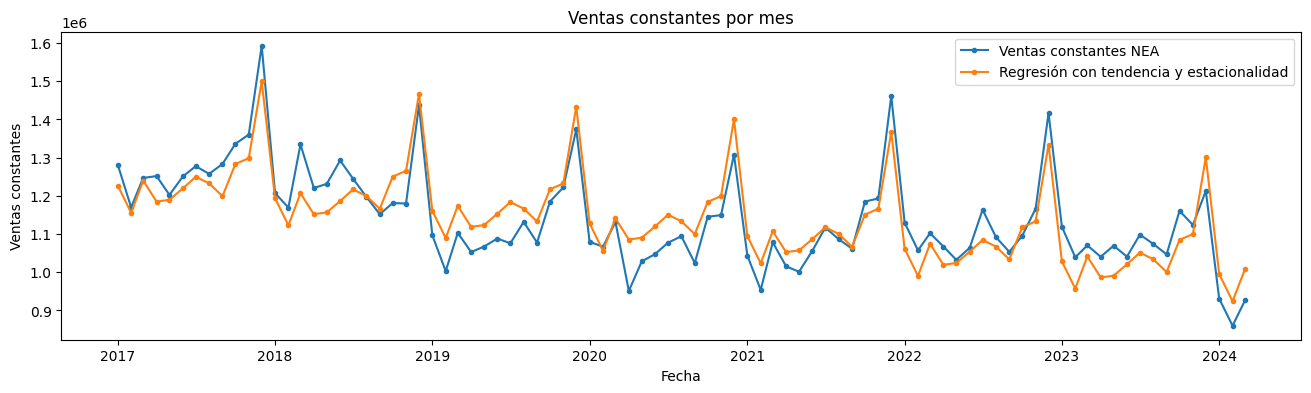

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(ventas_nea.index, ventas_nea.ventas_cons, marker='.', linestyle='-', label="Ventas constantes NEA")
plt.plot(ventas_nea.index, preds_tend_estac, marker='.', linestyle='-', label="Regresión con tendencia y estacionalidad")
plt.title('Ventas constantes por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas constantes')
plt.legend()
plt.show()

Agregamos una variable de rezago o lag al modelo. Entoncemos tenemos un modelo AR(1) con tedencia y estacionalidad de la forma:
$$ y_t = \beta_0 +\beta_1.y_{t-1} +\alpha_1.t + \delta_1.d_1 + u_t$$

In [ ]:
ventas_nea['ventas_cons_lag1'] = ventas_nea['ventas_cons'].shift(1)

In [ ]:
X = ventas_nea.dropna(subset=['ventas_cons_lag1'])[['tendencia','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12','ventas_cons_lag1']]
X = sm.add_constant(X)
y = ventas_nea.dropna(subset=['ventas_cons_lag1'])['ventas_cons']

reg_tend_estac_lag = sm.OLS(y,X).fit()
reg_tend_estac_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ventas_cons   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     52.60
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           2.06e-31
Time:                        14:44:44   Log-Likelihood:                -1030.5
No. Observations:                  86   AIC:                             2089.
Df Residuals:                      72   BIC:                             2123.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.355e+04   1.21e+05      0.444      0.658   -1.87e+05    2.94e+05
tendencia         -665.9186    278.711     -2.389      0.020   -1221.518    -110.319
mes_2               1.7e+05   3.22e+04      5.286      0.000    1.06e+05    2.34e+05
mes_3             3.091e+05   3.62e+04      8.527      0.000    2.37e+05    3.81e+05
mes_4             1.816e+05    3.1e+04      5.855      0.000     1.2e+05    2.43e+05
mes_5             2.378e+05   3.46e+04      6.873      0.000    1.69e+05    3.07e+05
mes_6             2.646e+05   3.42e+04      7.745      0.000    1.97e+05    3.33e+05
mes_7             2.732e+05   3.23e+04      8.455      0.000    2.09e+05    3.38e+05
mes_8             2.334e+05   3.05e+04      7.647      0.000    1.73e+05    2.94e+05
mes_9             2.136e+05   3.13e+04      6.828      0.000    1.51e+05    2.76e+05
mes_10            3.241e+05    3.3e+04      9.827      0.000    2.58e+05     3.9e+05
mes_11            2.758e+05   2.84e+04      9.698      0.000    2.19e+05    3.32e+05
mes_12            4.661e+05   2.76e+04     16.877      0.000    4.11e+05    5.21e+05
ventas_cons_lag1     0.7611      0.078      9.784      0.000       0.606       0.916
==============================================================================
Omnibus:                        1.498   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                0.942
Skew:                          -0.211   Prob(JB):                        0.624
Kurtosis:                       3.290   Cond. No.                     3.74e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

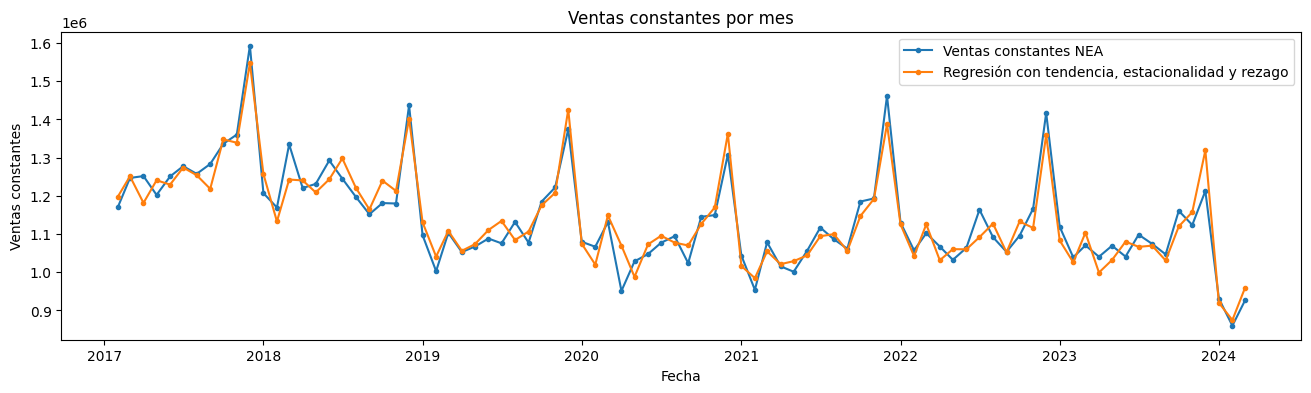

In [ ]:
preds_tend_estac_lag = reg_tend_estac_lag.predict(X)

plt.figure(figsize=(16, 4))
plt.plot(ventas_nea.dropna(subset=['ventas_cons_lag1']).index, ventas_nea.dropna(subset=['ventas_cons_lag1']).ventas_cons, marker='.', linestyle='-', label="Ventas constantes NEA")
plt.plot(ventas_nea.dropna(subset=['ventas_cons_lag1']).index, preds_tend_estac_lag, marker='.', linestyle='-', label="Regresión con tendencia, estacionalidad y rezago")
plt.title('Ventas constantes por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas constantes')
plt.legend()
plt.show()

Otra forma de modelar tendencia en vez de las dummies es agregar un rezago con el periodo estacional, por ejemplo si es mensual un lag 12, entonces nos quedaría el modelo como sigue:
$$ y_t =\beta_0 + \beta_1.t +\alpha_1.y_{t-1} + \alpha_{12}.y_{t-12} $$
Tener en cuenta que lo único malo de esta especificación es que perdemos 12 observaciones.

In [ ]:
ventas_nea['ventas_cons_lag12'] = ventas_nea['ventas_cons'].shift(12)

In [ ]:
X = ventas_nea.dropna(subset=['ventas_cons_lag12'])[['tendencia','ventas_cons_lag1','ventas_cons_lag12']]
X = sm.add_constant(X)
y = ventas_nea.dropna(subset=['ventas_cons_lag12'])['ventas_cons']

reg_tend_estac_lag = sm.OLS(y,X).fit()
reg_tend_estac_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ventas_cons   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.97
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           1.68e-14
Time:                        14:54:41   Log-Likelihood:                -942.82
No. Observations:                  75   AIC:                             1894.
Df Residuals:                      71   BIC:                             1903.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.52e+05   1.24e+05      1.228      0.223   -9.47e+04    3.99e+05
tendencia           195.8067    442.885      0.442      0.660    -687.281    1078.895
ventas_cons_lag1      0.1820      0.074      2.455      0.017       0.034       0.330
ventas_cons_lag12     0.6494      0.076      8.557      0.000       0.498       0.801
==============================================================================
Omnibus:                        2.682   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.262   Jarque-Bera (JB):                2.317
Skew:                           0.069   Prob(JB):                        0.314
Kurtosis:                       3.850   Cond. No.                     2.43e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

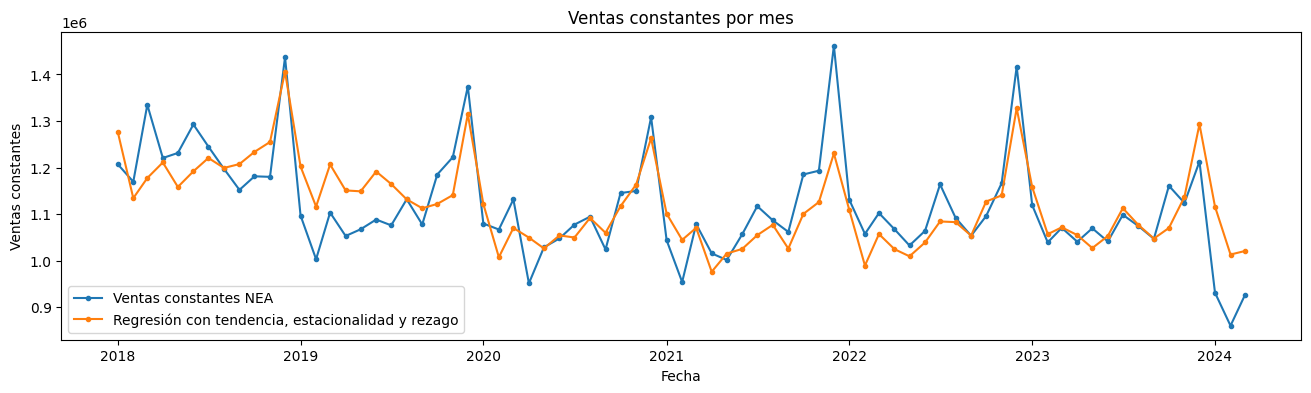

In [ ]:
preds_tend_estac_lag = reg_tend_estac_lag.predict(X)

plt.figure(figsize=(16, 4))
plt.plot(ventas_nea.dropna(subset=['ventas_cons_lag12']).index, ventas_nea.dropna(subset=['ventas_cons_lag12']).ventas_cons, marker='.', linestyle='-', label="Ventas constantes NEA")
plt.plot(ventas_nea.dropna(subset=['ventas_cons_lag12']).index, preds_tend_estac_lag, marker='.', linestyle='-', label="Regresión con tendencia, estacionalidad y rezago")
plt.title('Ventas constantes por mes')
plt.xlabel('Fecha')
plt.ylabel('Ventas constantes')
plt.legend()
plt.show()

Observamos que si bien capta cierta estacionalidad en diciembre los pronósticos son peores que si incluimos las dummies. Quizas agregando más rezagos entre el 1 y el 12 se puede mejorar la predicción. Se los dejamos de práctica para ustedes.

## Despacho de Cemento y EMAE Sector Construcción (Letra F)

El siguiente ejemplo es para mostrar un caso de series de tiempo con el adicional de un regresor. En este caso intentaremos pronosticar la actividad del sector de la construcción mediante el Estimador Mensual de la Actividad Económica (EMAE) correspondiente a dicho sector (letra F) utilizando como variable regresora el despacho de cemento Portland.

Fuentes:
* [Despacho de cemento (AFCP)](https://www.afcp.org.ar/copia-de-despacho-de-cemento-y-cons)
* [EMAE (INDEC)](https://www.indec.gob.ar/indec/web/Nivel4-Tema-3-9-48)

Cargamos las bases

In [ ]:
cemento = pd.read_csv('Bases/despacho_cemento.csv', sep=';', parse_dates=["fecha"])
emae = pd.read_csv('Bases/emae.csv', sep=';', parse_dates=["fecha"])

In [ ]:
cemento.head()

,fecha,cemento
0,2004-01-01,466421.0
1,2004-02-01,446497.5
2,2004-03-01,520634.1
3,2004-04-01,415446.1
4,2004-05-01,448531.1


In [ ]:
emae.head()

,fecha,letra_a,letra_b,letra_c,letra_d,letra_e,letra_f,letra_g,letra_h,letra_i,letra_j,letra_k,letra_l,letra_m,letra_n,letra_o,impuestos_netos
0,2004-01-01,65.995350,42.547868,100.704499,91.454610,99.917983,95.938047,92.065338,108.411682,95.506726,103.890256,91.418382,97.261268,95.627695,94.198394,97.006178,98.314856
1,2004-02-01,64.926598,62.440771,95.414186,89.424852,92.893440,98.853388,91.464718,103.448256,90.736414,96.481464,94.046978,97.882285,96.084246,90.313462,96.836135,89.730000
2,2004-03-01,110.666560,174.084646,100.251038,101.426433,103.770210,103.124529,109.127780,101.061842,97.175809,98.304568,99.648725,97.718459,96.380304,98.081488,96.155043,99.139119
3,2004-04-01,150.065920,153.877638,96.697547,98.437312,97.009849,95.815492,99.420141,93.242999,99.706933,95.315896,97.602261,98.405542,97.711867,102.184345,98.083137,98.321770
4,2004-05-01,209.388076,132.357664,104.100533,100.353138,102.471825,97.994567,100.532744,90.985260,105.552437,97.004671,99.803493,99.208518,99.136888,102.761265,98.054349,103.825463


Las dos series comienzan en enero de 2004 pero difieren en cuando finalizan.

In [ ]:
cemento_fecha_fin = cemento.fecha.max()
emae_fecha_fin = emae.fecha.max()

print(f'El último dato disponible de cemento corresponde a {cemento_fecha_fin}')
print(f'El último dato disponible del EMAE corresponde a {emae_fecha_fin}')

El último dato disponible de cemento corresponde a 2024-04-01 00:00:00
El último dato disponible del EMAE corresponde a 2024-03-01 00:00:00


Unimos las bases primeramente. Para ello recurrimos al comando pd.merge().

Este comando lo van a utilizar mucho si quieren hacer uniones de distintas bases por columnas. Los parámetros a tener en cuenta son:
* on: definimos la variable por la cual se va a realizar la union, es usado cuando tenemos el mismo nombre en ambas bases, como en esta caso que ambas se llaman "fecha".
* left_on, right_on: se usan cuando los nombres de la variable por la cual se van a unir difieren, en left_on se utiliza el nombre de la primera base que se introduce en el comando y en right_on la segunda.
* how: para esta variable tenemos 4 posibles opciones.
  1. left: matienen todas las filas de la base izquierda (la primera que nombramos en el comando) y deja los datos de la base de la derecha (segunda base) que crucen efectivamente con la primera.
  2. right: viceversa de la anterior, mantiene todo la base derecha y se queda solo con los datos que crucen de la primera con la segunda.
  3. inner: se mantienen los datos de ambas bases que crucen, es decir si un registro de una base solo existe en esa base, en este resultado se eliminaria.
  4. outer: lo contrario de la anterior, se queda con los valores de ambas bases que no haya habido un cruce exitoso.





En este caso voy a realizar un cruce "inner" entre cemento y emae, como resultado voy a tener datos hasta marzo de 2024, ya que emae no tiene datos para abril.

In [ ]:
base = pd.merge(cemento, emae[['fecha','letra_f']], on='fecha', how='inner')

Transformo cemento en un indice en base 2004 para poder graficar y comparar con el emae.

In [ ]:
cemento_2004 = cemento[cemento.fecha.dt.year==2004].cemento.mean()
base['indice_cemento'] = base['cemento']/cemento_2004*100

Grafico.

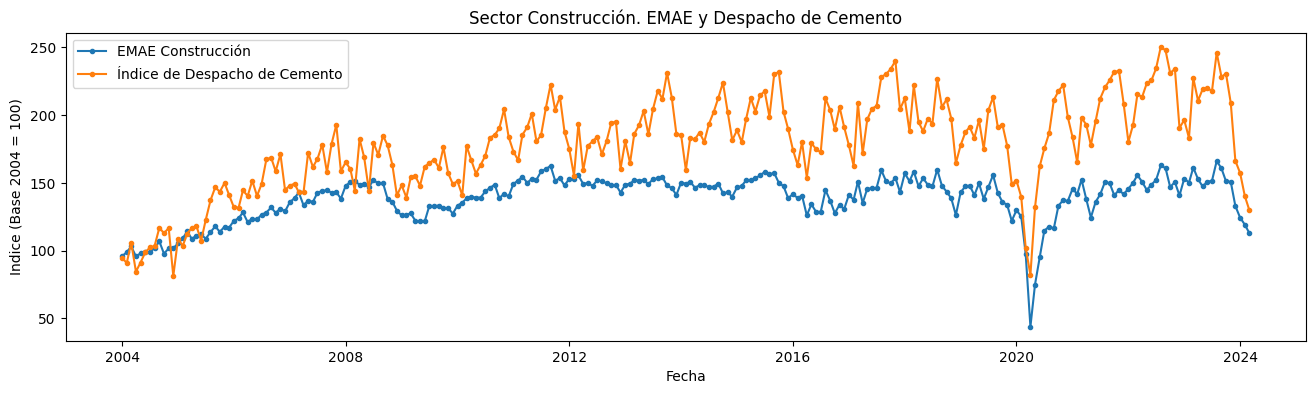

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(base.fecha, base.letra_f, marker='.', linestyle='-', label="EMAE Construcción")
plt.plot(base.fecha, base.indice_cemento, marker='.', linestyle='-', label="Índice de Despacho de Cemento")
plt.title('Sector Construcción. EMAE y Despacho de Cemento')
plt.xlabel('Fecha')
plt.ylabel('Indice (Base 2004 = 100)')
plt.legend()
plt.show()

Creamos primeramente un modelo simple entre el EMAE y el despacho de cemento.

In [ ]:
X = base[['indice_cemento']]
X = sm.add_constant(X)
y = base['letra_f']

reg_emae1 = sm.OLS(y,X).fit()
print(reg_emae1.summary())

                            OLS Regression Results                            
Dep. Variable:                letra_f   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     428.6
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           2.14e-55
Time:                        21:16:56   Log-Likelihood:                -911.87
No. Observations:                 243   AIC:                             1828.
Df Residuals:                     241   BIC:                             1835.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             68.2852      3.450     19.

Vemos que el cemento es significativo y si bien el R2 es relativamente alto, probaremos agregarle otras cosas par ver si mejora.

Agregamos la tendencia lineal.

In [ ]:
base['tedencia'] = np.arange(1, len(base)+1)

In [ ]:
X = base[['indice_cemento','tedencia']]
X = sm.add_constant(X)
y = base['letra_f']

reg_emae2 = sm.OLS(y,X).fit()
print(reg_emae2.summary())

                            OLS Regression Results                            
Dep. Variable:                letra_f   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     256.7
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           2.38e-60
Time:                        21:17:04   Log-Likelihood:                -897.02
No. Observations:                 243   AIC:                             1800.
Df Residuals:                     240   BIC:                             1811.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             60.9986      3.504     17.

Mejora un poco no más. Probamos tendencia cuadrática.

In [ ]:
base['tend_cuad'] = base['tedencia']**2

In [ ]:
X = base[['indice_cemento','tedencia','tend_cuad']]
X = sm.add_constant(X)
y = base['letra_f']

reg_emae3 = sm.OLS(y,X).fit()
print(reg_emae3.summary())

                            OLS Regression Results                            
Dep. Variable:                letra_f   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     187.3
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           1.79e-62
Time:                        21:17:11   Log-Likelihood:                -889.09
No. Observations:                 243   AIC:                             1786.
Df Residuals:                     239   BIC:                             1800.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             61.2007      3.399     18.

Ahora mejora bastante aunque afecta un poco la significatividad de la tendencia lineal.

Probamos crear una dummy para los meses.

In [ ]:
base['mes'] = base.fecha.dt.month
base = pd.get_dummies(base, columns=['mes'], drop_first=True, dtype=int)

In [ ]:
X = base[['indice_cemento','tedencia','tend_cuad','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']]
X = sm.add_constant(X)
y = base['letra_f']

reg_emae4 = sm.OLS(y,X).fit()
print(reg_emae4.summary())

                            OLS Regression Results                            
Dep. Variable:                letra_f   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     66.91
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           1.79e-72
Time:                        21:17:21   Log-Likelihood:                -837.86
No. Observations:                 243   AIC:                             1706.
Df Residuals:                     228   BIC:                             1758.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             53.0840      3.394     15.

Tenemos una aumento notable del R2. Lo único si notar que la tendencia lineal se hace insignificativa aunque la cuadrática lo sigue siendo, por ende no es conveniente quitarla.

Último paso, agregarle un rezago o lag a las variables.

In [ ]:
base['letra_f_lag1'] = base['letra_f'].shift(1)
base['cemento_lag1'] = base['cemento'].shift(1)

In [ ]:
X = base.dropna(subset='letra_f_lag1')[['indice_cemento','tedencia','tend_cuad','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12','letra_f_lag1','cemento_lag1']]
X = sm.add_constant(X)
y = base.dropna(subset='letra_f_lag1')['letra_f']

reg_emae5 = sm.OLS(y,X).fit()
print(reg_emae5.summary())

                            OLS Regression Results                            
Dep. Variable:                letra_f   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     200.6
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          2.49e-123
Time:                        21:18:32   Log-Likelihood:                -699.39
No. Observations:                 242   AIC:                             1433.
Df Residuals:                     225   BIC:                             1492.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             17.4436      2.696      6.

El R2 es más del 90% y la mayoría de las variables con algunas excepciones son significativas.

## Filtro HP

El filtro de Hodrick-Prescott (HP) es un método para extraer de una serie de tiempo su tendencia y ciclo.

Primero definimos una serie de la forma
$$ y_t = \tau_t +c_t $$
donde $\tau_t$ es la tendencia de la serie y $c_t$ el componente del ciclo.

Para encontrar la tendencia (y por consiguiente el ciclo) de la serie este método busca minimizar la siguiente expresión:
$$ min \sum_{t=1}^{T} (y_t - \tau_t)^2 + \lambda \sum_{t=2}^{T-1}[(\tau_{t+1}-\tau_t)-(\tau_t - \tau_{t-1})]^2$$

$\lambda$ es un parametro que define que tan ajustada a nuestra serie termina siendo nuestra tendencia. Notar que cuand $\lambda=0$ el segundo término se elimina y queda solo el primero.
$$ min \sum_{t=1}^{T} (y_t - \tau_t)^2 $$
Que minimizando implica que
$$ y_t = \tau_t $$
Esto significa que la tendencia está copiando la serie original.
Mientras que si tendemos $\lambda$ al infinito la tendencia termina por transformarse en una tendencia lineal.

Una vez se eligó un $\lambda$ y se obtuvo la tendencia, el ciclo se obtiene por simple diferencia.
$$ c_t=y_t-\tau_t $$

Cargamos una base de datos de patentamiento de autos.
Link: https://datos.gob.ar/dataset/justicia-estadistica-tramites-automotores

In [ ]:
patentamientos = pd.read_csv('https://datos.jus.gob.ar/dataset/1ab0cc03-ab9b-4520-975c-5757d87d1061/resource/4358c995-bb04-4ad9-be4a-a9076dc3e42c/download/estadistica-inscripciones-iniciales-automotores-2000-01-2024-05.csv')

In [ ]:
patentamientos.head()

,tipo_vehiculo,anio_inscripcion_inicial,mes_inscripcion_inicial,provincia_inscripcion_inicial,letra_provincia_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_id
0,Automotores,2000,1,Buenos Aires,B,16346,6
1,Automotores,2000,1,Catamarca,K,361,10
2,Automotores,2000,1,Chaco,H,551,22
3,Automotores,2000,1,Chubut,U,802,26
4,Automotores,2000,1,Ciudad Autónoma de Bs.As.,C,8892,2


Generamos una columna de fecha para agregar más facil e indexar también.

In [ ]:
patentamientos['day'] = 1

patentamientos = patentamientos.rename(columns={'anio_inscripcion_inicial': 'year', 'mes_inscripcion_inicial': 'month'})

patentamientos['fecha'] = pd.to_datetime(patentamientos[['year', 'month','day']])

patentamientos = patentamientos.drop(columns=['year', 'month', 'day'])

Agrego los patentamientos por fecha para tener a nivel nacional.

In [ ]:
patentamientos = patentamientos.groupby('fecha').sum()

In [ ]:
patentamientos.head()

,tipo_vehiculo,provincia_inscripcion_inicial,letra_provincia_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_id
fecha,,,,,
2000-01-01,AutomotoresAutomotoresAutomotoresAutomotoresAu...,Buenos AiresCatamarcaChacoChubutCiudad Autónom...,BKHUCXWEPYLFMNQRAJDZSGVT,46926,1152
2000-02-01,AutomotoresAutomotoresAutomotoresAutomotoresAu...,Buenos AiresCatamarcaChacoChubutCiudad Autónom...,BKHUCXWEPYLFMNQRAJDZSGVT,32798,1152
2000-03-01,AutomotoresAutomotoresAutomotoresAutomotoresAu...,Buenos AiresCatamarcaChacoChubutCiudad Autónom...,BKHUCXWEPYLFMNQRAJDZSGVT,32504,1152
2000-04-01,AutomotoresAutomotoresAutomotoresAutomotoresAu...,Buenos AiresCatamarcaChacoChubutCiudad Autónom...,BKHUCXWEPYLFMNQRAJDZSGVT,26641,1152
2000-05-01,AutomotoresAutomotoresAutomotoresAutomotoresAu...,Buenos AiresCatamarcaChacoChubutCiudad Autónom...,BKHUCXWEPYLFMNQRAJDZSGVT,27580,1152


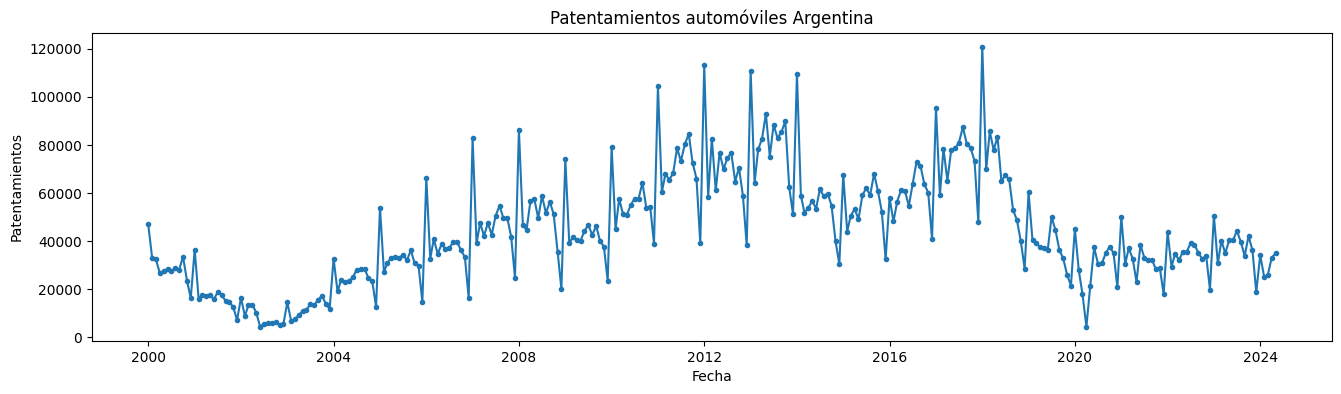

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(patentamientos.index, patentamientos.cantidad_inscripciones_iniciales, marker='.', linestyle='-')
plt.title('Patentamientos automóviles Argentina')
plt.xlabel('Fecha')
plt.ylabel('Patentamientos')
plt.show()

Obtenemos distintos filtro de lambda y graficamos para comparar.

In [ ]:
cycle1, trend1 = hpfilter(patentamientos.cantidad_inscripciones_iniciales, lamb=0)
cycle2, trend2 = hpfilter(patentamientos.cantidad_inscripciones_iniciales, lamb=200)
cycle3, trend3 = hpfilter(patentamientos.cantidad_inscripciones_iniciales, lamb=1600)
cycle4, trend4 = hpfilter(patentamientos.cantidad_inscripciones_iniciales, lamb=50000)

Comparamos la serie original contra las distintas tendencias obtenidas variando los $\lambda$.

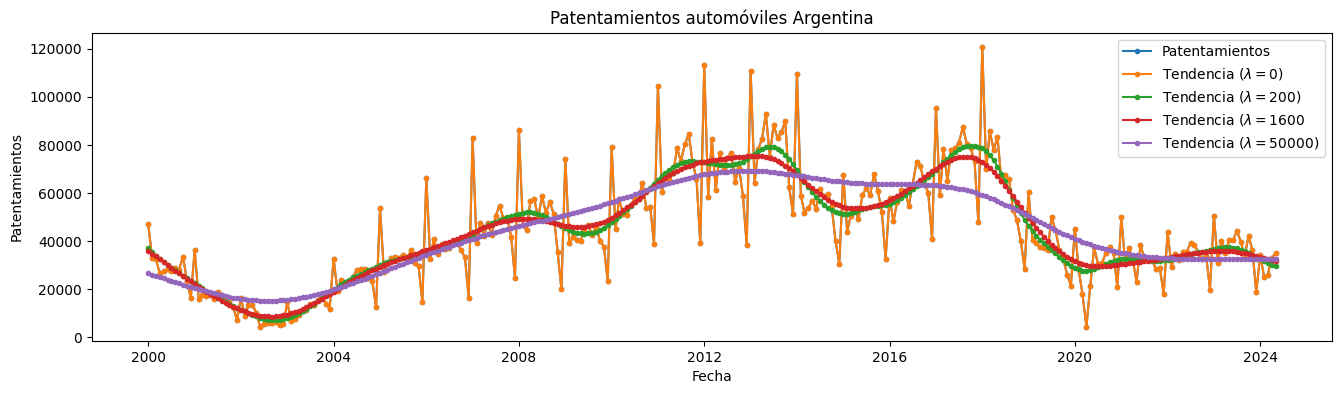

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(patentamientos.index, patentamientos.cantidad_inscripciones_iniciales, marker='.', linestyle='-', label="Patentamientos")
plt.plot(patentamientos.index, trend1, marker='.', linestyle='-', label="Tendencia ($\lambda=0$)")
plt.plot(patentamientos.index, trend2, marker='.', linestyle='-', label="Tendencia ($\lambda=200$)")
plt.plot(patentamientos.index, trend3, marker='.', linestyle='-', label="Tendencia ($\lambda=1600$)")
plt.plot(patentamientos.index, trend4, marker='.', linestyle='-', label="Tendencia ($\lambda=50000$)")
plt.title('Patentamientos automóviles Argentina')
plt.xlabel('Fecha')
plt.ylabel('Patentamientos')
plt.legend()
plt.show()

Ahora graficamos los ciclos.

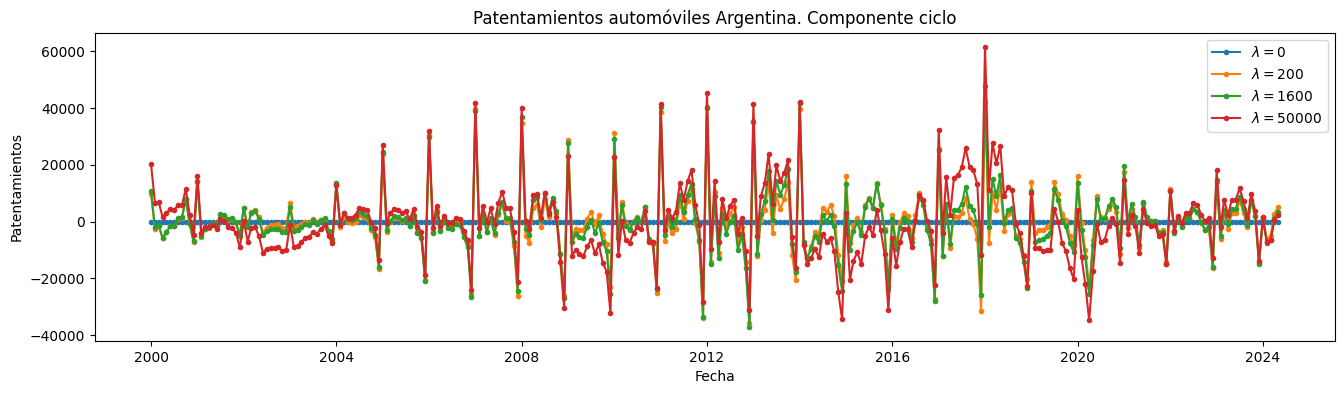

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(patentamientos.index, cycle1, marker='.', linestyle='-', label="$\lambda=0$")
plt.plot(patentamientos.index, cycle2, marker='.', linestyle='-', label="$\lambda=200$")
plt.plot(patentamientos.index, cycle3, marker='.', linestyle='-', label="$\lambda=1600$")
plt.plot(patentamientos.index, cycle4, marker='.', linestyle='-', label="$\lambda=50000$")
plt.title('Patentamientos automóviles Argentina. Componente ciclo')
plt.xlabel('Fecha')
plt.ylabel('Patentamientos')
plt.legend()
plt.show()

## Gráficos de estacionalidad

Agregamos unos gráficos para visualizar estacionalidad en las series.

Primero creamos una serie para cada año y graficamos en el eje X el mes. De esta forma podemos comparar si hay un patrón que se repite año a año.

Creamos variables para año y mes.

In [ ]:
patentamientos['anio'] = patentamientos.index.year
patentamientos['mes'] = patentamientos.index.month

Creamos una serie para cada año.

In [ ]:
series_anios = pd.DataFrame(index=patentamientos.mes.unique())

for anio in patentamientos.anio.unique():
    series_anios[f'serie_{anio}'] = patentamientos[patentamientos.anio==anio].set_index('mes').cantidad_inscripciones_iniciales

In [ ]:
series_anios

,serie_2000,serie_2001,serie_2002,serie_2003,serie_2004,serie_2005,serie_2006,serie_2007,serie_2008,serie_2009,...,serie_2015,serie_2016,serie_2017,serie_2018,serie_2019,serie_2020,serie_2021,serie_2022,serie_2023,serie_2024
1,46926,36451,16382,14503,32743,53721,66276,82813,86214,74053,...,67627,57975,95432,120820,60351,45170,49930,43794,50616,34165.0
2,32798,16107,8812,6749,19075,27129,32754,39156,46811,39196,...,43991,48166,59114,69814,40294,27804,30632,29321,30705,25213.0
3,32504,17594,13497,7503,23929,31050,40837,47511,44559,41507,...,50516,56459,78487,85640,39282,17929,37075,34782,40131,25975.0
4,26641,17129,13641,9271,22806,33139,34671,42184,56732,40653,...,53422,61155,65135,77814,37498,4428,32645,32118,34963,33122.0
5,27580,17606,10255,10842,23503,33596,38660,47516,57664,40257,...,49064,60921,77865,83430,36959,21276,23083,35553,40361,34914.0
6,28428,15780,4412,11380,24901,32899,36832,42677,49576,44167,...,59035,54644,78582,64808,36320,37398,38433,35656,40301,NaN
7,27415,18749,5597,13759,28193,34385,37141,50448,58769,46733,...,62044,63793,80977,67374,50055,30596,33169,39107,44325,NaN
8,28868,17566,5993,13429,28226,32009,39587,54708,51707,42564,...,59124,73066,87381,65666,44574,30723,31998,38595,39701,NaN
9,28157,15180,5898,15537,28411,36248,39809,49467,56348,46274,...,68043,71280,80428,52900,36296,35125,32137,35020,33844,NaN
10,33588,14763,6226,17340,24790,30759,36157,49749,51197,40255,...,60953,63732,78768,48783,32781,37638,28240,32646,42151,NaN


Ahora graficamos cada serie anual con el eje X fijado en los meses.

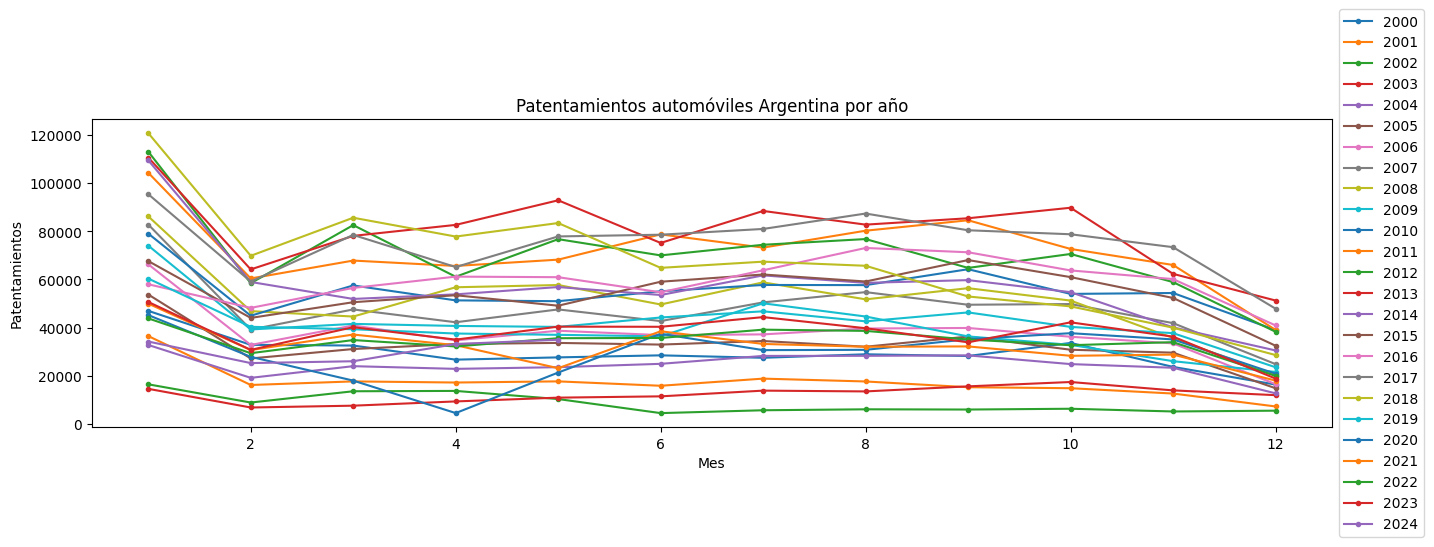

In [ ]:
plt.figure(figsize=(16, 4))

for anio in range(2000,2025):
    plt.plot(series_anios.index, series_anios[f'serie_{anio}'], marker='.', linestyle='-', label=anio)
plt.title('Patentamientos automóviles Argentina por año')
plt.xlabel('Mes')
plt.ylabel('Patentamientos')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

También otra forma de ver la estacionalidad es ver si hay cambios año a año y así como también observar el promedio estacional, en este caso mensual.

Creamos una base nueva para no tocar la primera, y ordenamos de forma que nos queden los valores de cada mes juntos ordenados de menor a mayor por año.

In [ ]:
patentamientos2 = patentamientos.copy()
patentamientos2 = patentamientos2.sort_values(by=['mes', 'anio'])
patentamientos2.head()

,tipo_vehiculo,provincia_inscripcion_inicial,letra_provincia_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_id,anio,mes
fecha,,,,,,,
2000-01-01,AutomotoresAutomotoresAutomotoresAutomotoresAu...,Buenos AiresCatamarcaChacoChubutCiudad Autónom...,BKHUCXWEPYLFMNQRAJDZSGVT,46926,1152,2000,1
2001-01-01,AutomotoresAutomotoresAutomotoresAutomotoresAu...,Buenos AiresCatamarcaChacoChubutCiudad Autónom...,BKHUCXWEPYLFMNQRAJDZSGVT,36451,1152,2001,1
2002-01-01,AutomotoresAutomotoresAutomotoresAutomotoresAu...,Buenos AiresCatamarcaChacoChubutCiudad Autónom...,BKHUCXWEPYLFMNQRAJDZSGVT,16382,1152,2002,1
2003-01-01,AutomotoresAutomotoresAutomotoresAutomotoresAu...,Buenos AiresCatamarcaChacoChubutCiudad Autónom...,BKHUCXWEPYLFMNQRAJDZSGVT,14503,1152,2003,1
2004-01-01,AutomotoresAutomotoresAutomotoresAutomotoresAu...,Buenos AiresCatamarcaChacoChubutCiudad Autónom...,BKHUCXWEPYLFMNQRAJDZSGVT,32743,1152,2004,1


Obtengo los promedios por año en una columna. Y elimino los valores promedio del primer y ultimo año a fines estéticos.

In [ ]:
patentamientos2['promedio'] = patentamientos2.groupby('mes').cantidad_inscripciones_iniciales.transform('mean')

Finalmente graficamos. Pero primero creamos un indice para facilitarnos el plot.

In [ ]:
patentamientos2['indice'] = range(0, len(patentamientos2))

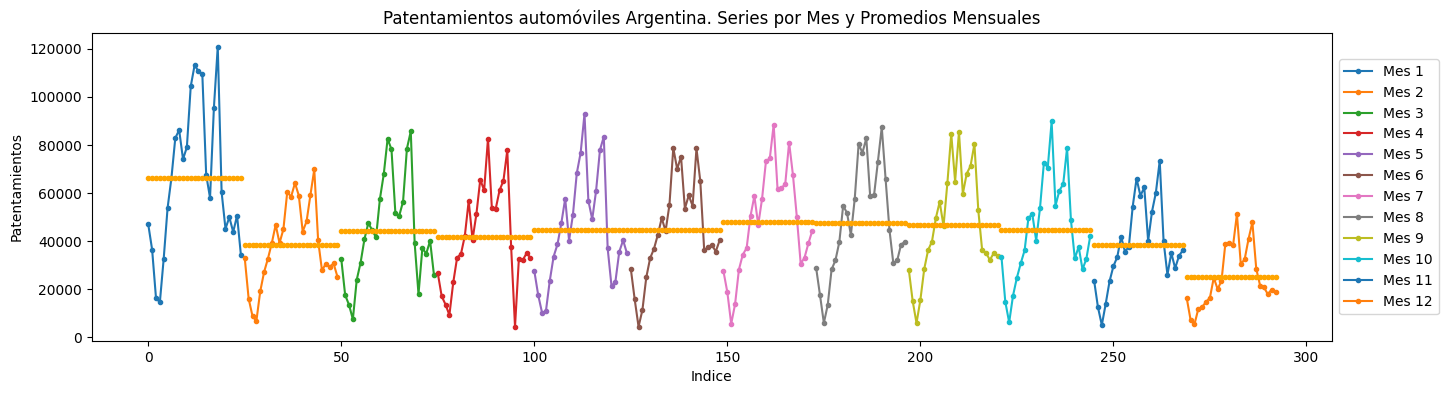

In [ ]:
plt.figure(figsize=(16, 4))

for mes in range(1,13):
  plt.plot(patentamientos2[patentamientos2.mes==mes].indice, patentamientos2[patentamientos2.mes==mes].cantidad_inscripciones_iniciales, marker='.', linestyle='-', label=f"Mes {mes}")
  plt.plot(patentamientos2[patentamientos2.mes==mes].indice, patentamientos2[patentamientos2.mes==mes].promedio, marker='.', linestyle='-', color="orange")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Patentamientos automóviles Argentina. Series por Mes y Promedios Mensuales')
plt.xlabel('Indice')
plt.ylabel('Patentamientos')
plt.show()